In [1]:
import torch
from torch_geometric.data import Data
import numpy as np
import networkx as nx
from torch_geometric.nn import MessagePassing
from torch_geometric.utils import add_self_loops, degree
import matplotlib.pyplot as plt
import scipy.special as SS
import pandas as pd
import scipy.stats as SSA
import copy

In [8]:
%run ../codes/branching_realM.py

In [3]:
R0_ts = pd.read_csv('df_EpiEstim_R_median.csv',index_col='Date')
R0_ts.fillna(0, inplace=True)
pop_sorted = np.loadtxt('pop_sorted.csv')
N = pop_sorted.shape[0]
file_path = '/Users/qingyao/Documents/branching_data/real_data/' ##M_202003_10.csv

In [4]:
Z = 3  # latent period
Zb = 1  # scale parameter for Z
D = 5  # infectious period
Db = 1  # scale parameter for b

In [5]:
my_seeds = [(1824, 10),(2935, 45),(175,25),(576,10),(338,10)]

In [39]:
T = 60
# M_E_NewInf = np.zeros((2, 100, 3108, 60))
rs = [0.05,0.1]
for r_idx in range(1,2):
    r = rs[r_idx]
    print(r)
    for e_i in range(30,50):
        P_ts = pd.DataFrame()
        P_ts.index = R0_ts.index
        df_to_add = R0_ts[R0_ts.columns.values].apply(lambda x: r/(x+r))
        P_ts = pd.concat([P_ts, df_to_add], axis=1)
        P_ts_s = P_ts.iloc[22:100,:]
        P_ts_s = P_ts_s.reset_index().rename(columns={'index': 'Date'})
        ss = np.random.SeedSequence()
        E_NewInf_i, E_TotInf_i = superspreading_T_Loc_real(T, N, my_seeds, (r, P_ts_s), pop_sorted, (Z, Zb, D, Db), file_path, ss)
        M_E_NewInf[r_idx,e_i,:,:] = E_NewInf_i

0.1


In [40]:
e_i

49

In [41]:
def count_num_counties(E_NewInf_i, pop_sorted, th):
    estimated_infec_perpop = E_NewInf_i/pop_sorted[:,None]*100000
    county_real = np.sum(estimated_infec_perpop>th,axis=0)
    return county_real

In [16]:
Ensembles = M_E_NewInf[0, :50, :, :]

In [29]:
Ensembles_0 = copy.deepcopy(Ensembles)
Ensembles_0[Ensembles_0 == 0] = 0.000000000000001
Ensembles_log = np.log(Ensembles_0)

In [45]:
M_counties = np.zeros((60,2,50))
for r_idx in range(2):
    for e_i in range(50):
        NewInf_i = M_E_NewInf[r_idx,e_i, :,:]
        M_counties[:,r_idx,e_i] = count_num_counties(NewInf_i, pop_sorted, 10)

In [46]:
M_counties_mean = np.mean(M_counties,axis=2)
M_counties_std = np.std(M_counties,axis=2)

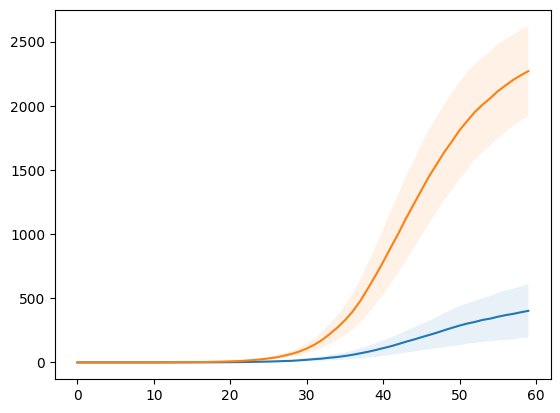

In [47]:
plt.plot(M_counties_mean[:,0])
plt.fill_between(range(60),M_counties_mean[:,0]-M_counties_std[:,0],M_counties_mean[:,0] +M_counties_std[:,0],alpha=0.1)

plt.plot(M_counties_mean[:,1])
plt.fill_between(range(60),M_counties_mean[:,1]-M_counties_std[:,1],M_counties_mean[:,1] +M_counties_std[:,1],alpha=0.1)